### Display Raw Data

In [4]:
import Modularized_Data_Processing as mdp
import mne
import glob

filepath = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-1.2-11-2021_raw.fif.gz"

PATH1 = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH2 = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH = PATH1
FILENAME1 = PATH + "BCIproject_trial-S5_raw.fif.gz"
FILENAME2 = PATH + "BCIproject_trial-S3_raw.fif.gz"
FILENAME3 = PATH + "BCIproject_trial-1.2-11-2021_raw.fif.gz"
S_FILES = [f for f in glob.glob(PATH + '*S*raw.fif.gz')]
N_FILES = [f for f in glob.glob(PATH + '*N*raw.fif.gz')]
NEW_N_FILES = [f for f in glob.glob(PATH + '*N-*raw.fif.gz')]
FILENAMES = NEW_N_FILES

#Load data
#data = mdp.load_data(filepath)

data = mdp.load_many_data(FILENAMES)

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-1.2-11-2021_raw.fif.gz...
    Range : 0 ... 124702 =      0.000 ...   124.702 secs
Ready.
Reading 0 ... 124702  =      0.000 ...   124.702 secs...
Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-2.2-11-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-3.2-11-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
The length of raw_data is:3


In [5]:
data.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, CP1, CP2, FC1, FC2, O1, O2, F7, F8, Fz, Cz, T3, T4, P3, P4
 chs: 16 EEG
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 1000.0 Hz
>

In [7]:
sfreq = data.info['sfreq']
print("Sample freq (sfreq) is: " + str(sfreq) + " Hz")

Sample freq (sfreq) is: 1000.0 Hz


In [8]:
data.info.ch_names

['Fp1',
 'Fp2',
 'CP1',
 'CP2',
 'FC1',
 'FC2',
 'O1',
 'O2',
 'F7',
 'F8',
 'Fz',
 'Cz',
 'T3',
 'T4',
 'P3',
 'P4']

In [9]:
%matplotlib widget

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

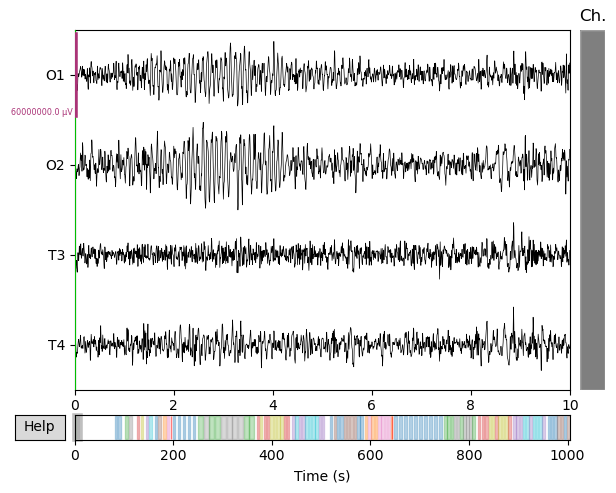

In [24]:
#display raw data

chns = data.info.ch_names

picks = ["O1", "O2", "T3", "T4"]

chn_idxs = []
for chn in picks:
    chn_idxs.append(chns.index(chn))

#apply the bandpass filter

low_fq = 5
hi_fq = 40

crpd_data = data.crop(2)
cd_fd_data = data.filter(5, 50)
    
cd_fd_data.plot(scalings="30", order=chn_idxs, n_channels=4, event_color={1 : "white"}) #How do I make this interactive; seems to work now

### Display Alpha-Waves on a Spectrogram

In [48]:
ants = [i["description"] for i in data.annotations]
novel_ants = []
for i in range(len(ants)):
    if ants[i] in ants:
        if ants[i] not in novel_ants:
            novel_ants.append(ants[i])
        continue
        
print(len(novel_ants))

13


In [15]:
epoch_type = "alpha"

f1_empty, f2 = mdp.get_epochs(epoch_type, data, nperseg=2000, noverlap=1000) #f1_empty should be empty in the case of alpha waves (there are no false alpha wave trials); only look at f2

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)

['True-alpha-', 'True-alpha-', 'False-SSVEP-', 'True-SSVEP-', 'False-TMI-a-', 'True-TMI-a-', 'False-TMI-i-', 'True-TMI-i-', 'False-LMI-a-', 'True-LMI-a-', 'False-LMI-i-', 'True-LMI-i-', 'BAD boundary', 'EDGE boundary', 'True-alpha-', 'True-alpha-', 'True-alpha-', 'True-alpha-', 'True-alpha-', 'False-SSVEP-', 'True-SSVEP-', 'False-SSVEP-', 'False-SSVEP-', 'True-SSVEP-', 'True-SSVEP-', 'True-SSVEP-', 'True-SSVEP-', 'False-SSVEP-', 'F

In [16]:
f2

In [17]:
for z in range(len(f2.specs)):
    mdp.plot_spectrogram(f2.ts[z], f2.fs[z], f2.specs[z])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\Documents\GitHub\openbci_laryngeal_imagery\code\Modularized_Data_Processing.py:221: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(5, 5))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …